<a href="https://colab.research.google.com/github/seanlam74/GMS6812/blob/master/GMS6812_PredictionDemo15Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GMS6812 Predictive Modeling Demo

#### Instructor: Sean Lam (Email: lam.shao.wei@singhealth.com.sg), Health Services Research, SingHealth and Duke NUS

In this demo, you will learn the following,
- Performed Explanatory Data Analysis and applied extensive feature engineering, feature selection and on Diabetes patient’s hospital readmission data.
- Built Decision Tree and Logistic classifiers in python using Scikit-Learn to predict which patients might be readmitted to the hospital.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare, ks_2samp
import numpy as np

In [ ]:
# Reading the data into python with "pandas", file in GItHub
url = 'https://github.com/seanlam74/GMS6812/blob/master/training_data.csv'
df = pd.read_csv(url, error_bad_lines=False)
data.shape

b'Skipping line 53: expected 1 fields, saw 2\nSkipping line 137: expected 1 fields, saw 3\nSkipping line 149: expected 1 fields, saw 6\nSkipping line 150: expected 1 fields, saw 3\nSkipping line 174: expected 1 fields, saw 4\nSkipping line 178: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 181: expected 1 fields, saw 2\nSkipping line 182: expected 1 fields, saw 2\nSkipping line 183: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 185: expected 1 fields, saw 2\nSkipping line 186: expected 1 fields, saw 2\nSkipping line 187: expected 1 fields, saw 2\nSkipping line 188: expected 1 fields, saw 2\nSkipping line 192: expected 1 fields, saw 2\nSkipping line 193: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 2\nSkipping line 202: expected 1 fields, saw 2\nSkipping line 210: expected 1 fields, saw 4\nSkipping line 216: expected 1 fields, saw 2\nSkipping line 221: expected 1 fields, saw 2\nSkipping 

(81415, 50)

In [ ]:
# Reading the data into python with "pandas"
# data=pd.read_csv('training_data.csv',header=0,skiprows=0,engine='python')
# data.shape

In [ ]:
# printing out first 5 observations
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,N


In [ ]:
#Printing all the columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81415 entries, 0 to 81414
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              81415 non-null  int64 
 1   patient_nbr               81415 non-null  int64 
 2   race                      79602 non-null  object
 3   gender                    81413 non-null  object
 4   age                       81415 non-null  object
 5   weight                    2570 non-null   object
 6   admission_type_id         81415 non-null  int64 
 7   discharge_disposition_id  81415 non-null  int64 
 8   admission_source_id       81415 non-null  int64 
 9   time_in_hospital          81415 non-null  int64 
 10  payer_code                49183 non-null  object
 11  medical_specialty         41479 non-null  object
 12  num_lab_procedures        81415 non-null  int64 
 13  num_procedures            81415 non-null  int64 
 14  num_medications       

In [ ]:
#Descriptive statistics of all the rows
pd.set_option('display.expand_frame_repr', False)
print(data.describe())

       encounter_id   patient_nbr  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  number_diagnoses
count  8.141500e+04  8.141500e+04       81415.000000              81415.000000         81415.000000      81415.000000        81415.000000    81415.000000     81415.000000       81415.000000      81415.000000      81415.000000      81415.000000
mean   1.652046e+08  5.431108e+07           2.020905                  3.709845             5.753792          4.398354           43.158165        1.338721        16.028950           0.365682          0.199435          0.635792          7.421826
std    1.025362e+08  3.869611e+07           1.445323                  5.267962             4.052096          2.985410           19.680093        1.705755         8.122102           1.235747          0.964605          1.262968          1.933431
min    1.252200e+04  1.3

Before we do analysis we need to make sure that there are no duplicate rows.<br> 
By looking at the data we can confirm that encounter_id is unique and we are checking if there are any duplicate encounter_ids and we find that there aren't any.

In [ ]:
ids = data['encounter_id']
data[ids.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
81414,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N


In [ ]:
#checking if there are any duplicates in encounter_id - no duplicates found
ids = data['encounter_id']
data[ids.isin(ids[ids.duplicated()])]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
81413,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N
81414,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N


In [ ]:
# remove duplicates and check again
data = data.drop_duplicates()
data[ids.duplicated()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [ ]:
# Considering values with '?' as missing values.
data = data.replace('?', np.NaN )

In [ ]:
# Two observation is unknown in gender. Replace it as a null value
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())
data = data.replace('Unknown/Invalid', np.NaN )

gender 0


In [ ]:
# finding the number of null values in each column
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         1813
gender                          2
age                             0
weight                      78844
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  32231
medical_specialty           39935
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         18
diag_2                        288
diag_3                       1125
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Any row that has more than 40% missing values is rejected.

In [ ]:
# Weight has almost 99% of missing data ; Payer_code and medical_speciality has around 45% of missing data. 
data.drop(['weight','payer_code','medical_specialty','diag_2', 'diag_3'],axis=1,inplace=True)
data.shape

(81414, 45)

In [ ]:
#Dropping rows with missing values
data.dropna(inplace=True)
data.shape

(79584, 45)

In [ ]:
data[0:3]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,N


In [ ]:
# creating a list of categorical and numeric columns names
categorical=data.select_dtypes(include=['object']) # select strings
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'gender' 'age' 'diag_1' 'max_glu_serum' 'A1Cresult' 'metformin'
 'repaglinide' 'nateglinide' 'chlorpropamide' 'glimepiride'
 'acetohexamide' 'glipizide' 'glyburide' 'tolbutamide' 'pioglitazone'
 'rosiglitazone' 'acarbose' 'miglitol' 'troglitazone' 'tolazamide'
 'examide' 'citoglipton' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
['encounter_id' 'patient_nbr' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'num_lab_procedures' 'num_procedures' 'num_medications'
 'number_outpatient' 'number_emergency' 'number_inpatient'
 'number_diagnoses']


In [ ]:
# printing the frequency count of all the categorical features
for col in categorical:
    print(categorical[col].value_counts())

Caucasian          60836
AfricanAmerican    15406
Hispanic            1615
Other               1215
Asian                512
Name: race, dtype: int64
Female    42850
Male      36734
Name: gender, dtype: int64
[70-80)     20412
[60-70)     17654
[80-90)     13470
[50-60)     13453
[40-50)      7531
[30-40)      2957
[90-100)     2163
[20-30)      1278
[10-20)       539
[0-10)        127
Name: age, dtype: int64
428    5330
414    5073
786    3157
410    2818
486    2768
       ... 
657       1
653       1
352       1
391       1
133       1
Name: diag_1, Length: 693, dtype: int64
None    75379
Norm     2020
>200     1182
>300     1003
Name: max_glu_serum, dtype: int64
None    66266
>8       6403
Norm     3939
>7       2976
Name: A1Cresult, dtype: int64
No        64041
Steady    14277
Up          817
Down        449
Name: metformin, dtype: int64
No        78366
Steady     1088
Up           95
Down         35
Name: repaglinide, dtype: int64
No        79020
Steady      535
Up           20
D

In [ ]:
# printing the frequency of all the numeric features
for col in numeric:
    print(numeric[col].value_counts())
# Didn't find any outliers

116046918    1
156142020    1
44001720     1
106920378    1
31279548     1
            ..
167599554    1
45102444     1
256779630    1
69338310     1
77856768     1
Name: encounter_id, Length: 79584, dtype: int64
88785891    33
43140906    25
88227540    22
1660293     21
88789707    19
            ..
43121745     1
2570319      1
3352653      1
27841248     1
93251151     1
Name: patient_nbr, Length: 58521, dtype: int64
1    42435
3    14727
2    14201
6     4168
5     3768
8      262
7       16
4        7
Name: admission_type_id, dtype: int64
1     47025
3     10886
6     10162
18     2924
2      1656
22     1606
11     1305
5       910
25      759
4       598
7       497
13      318
23      316
14      281
28      103
8        84
15       56
24       43
9        16
16       11
17       11
19        6
10        5
12        3
27        2
20        1
Name: discharge_disposition_id, dtype: int64
7     45435
1     23011
17     5305
4      2388
6      1592
2       820
5       672
3       

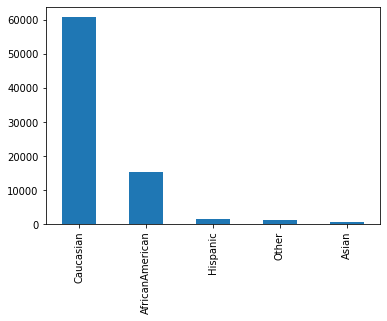

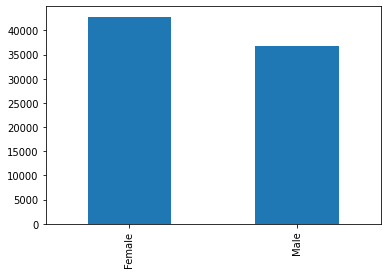

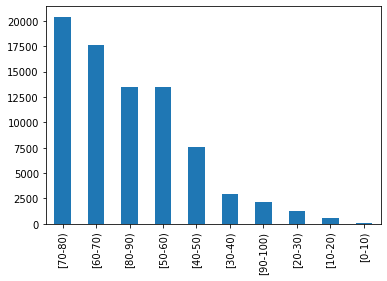

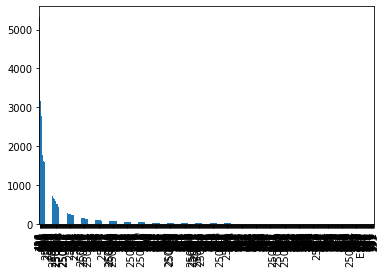

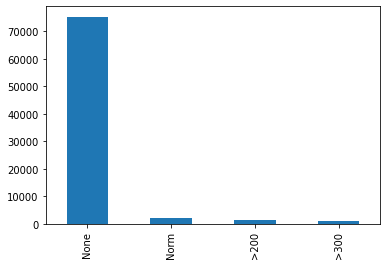

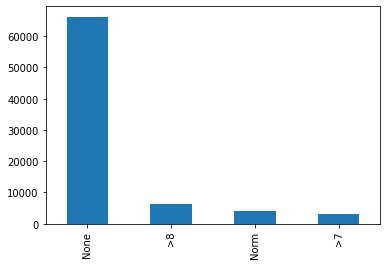

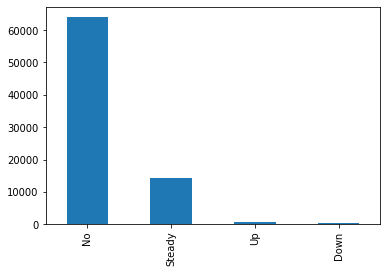

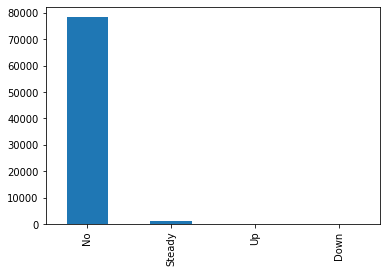

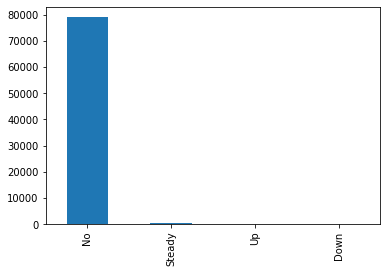

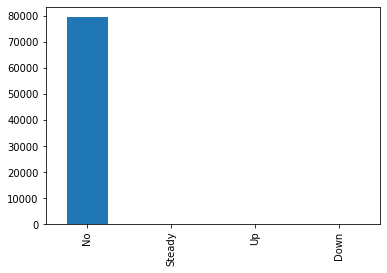

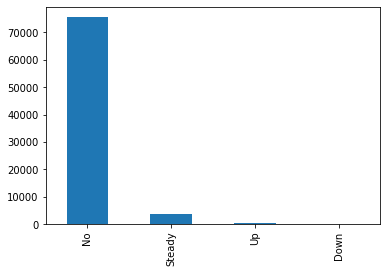

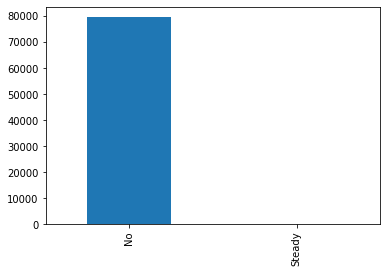

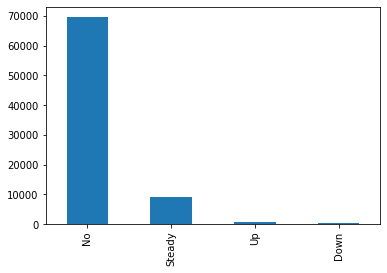

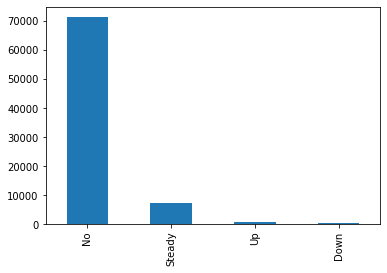

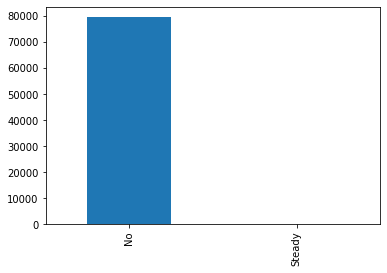

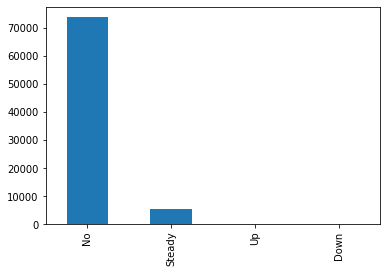

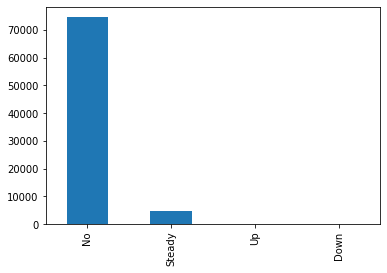

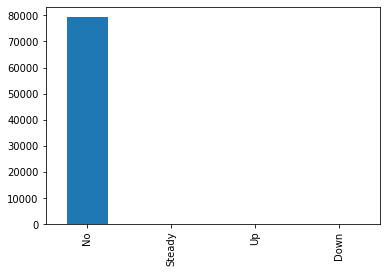

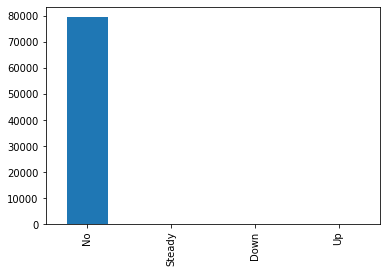

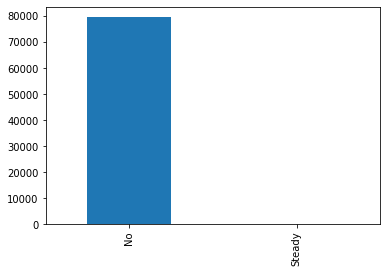

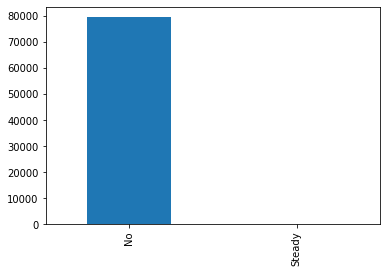

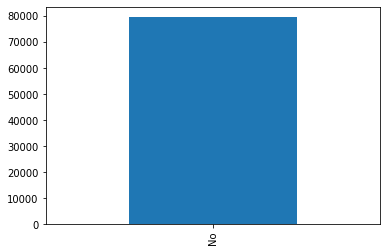

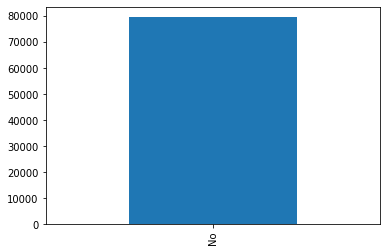

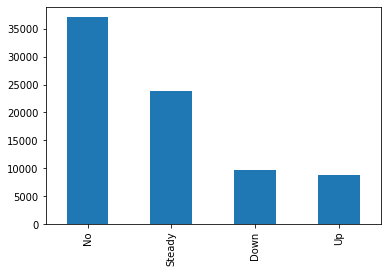

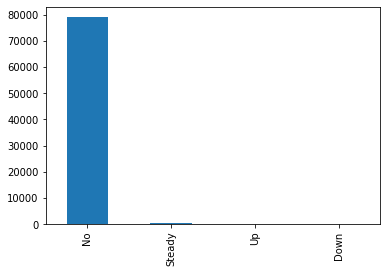

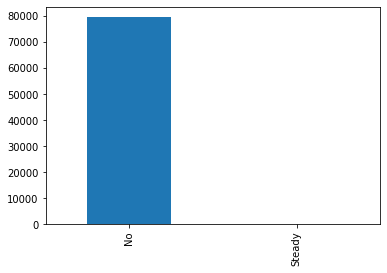

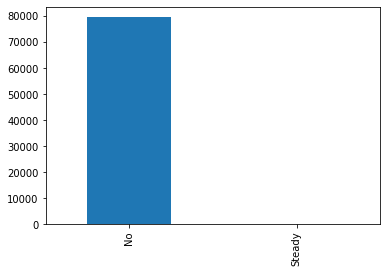

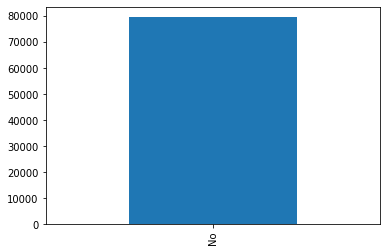

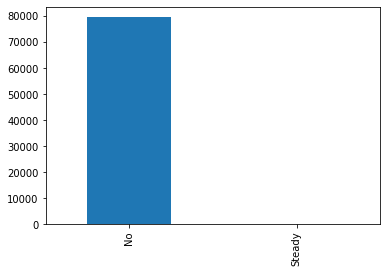

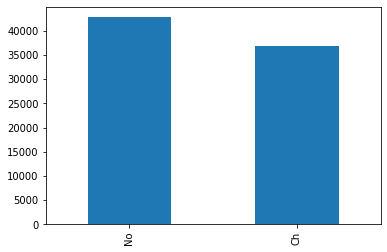

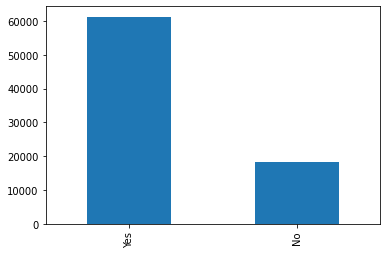

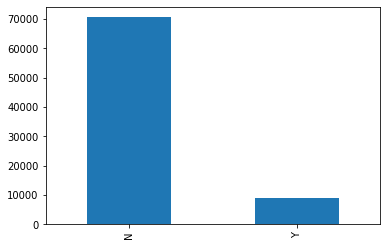

In [ ]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()    

In [ ]:
#data['max_glu_serum'].unique()

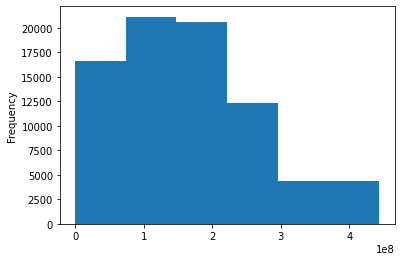

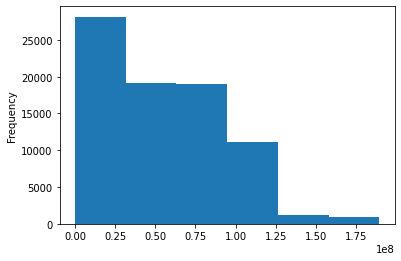

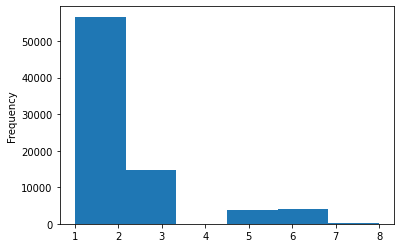

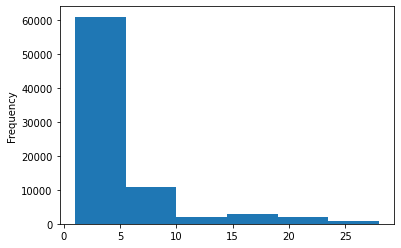

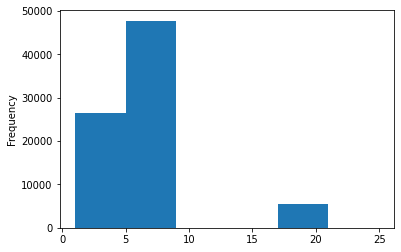

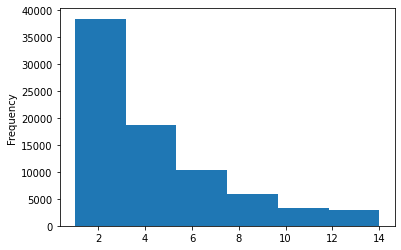

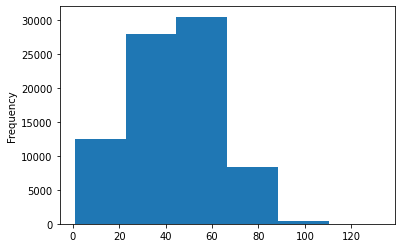

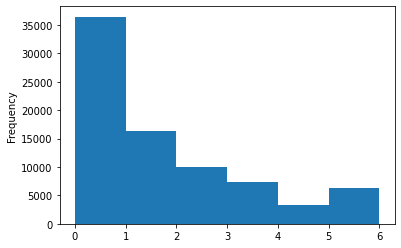

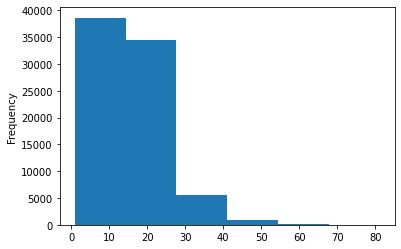

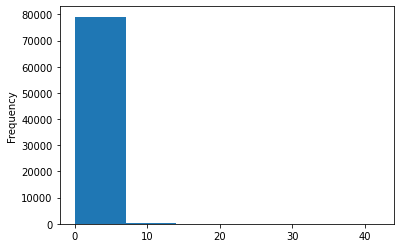

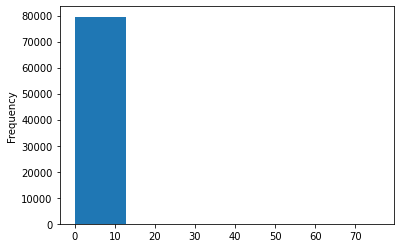

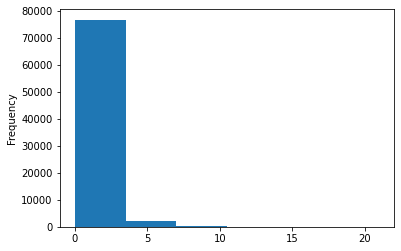

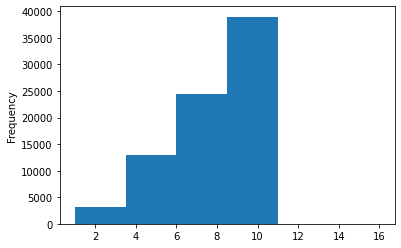

In [ ]:
for col in numeric:
    numeric[col].plot.hist(bins=6)
    plt.show()

In [ ]:
# Deleting the 2 columns because they have all the observations only in one category 
data.drop(['examide','citoglipton'],axis=1,inplace=True) # axis=1 column
data.shape

In [ ]:
#Making the target variable and other variables binary
data = data[data['readmitted'].isin(['Y', 'N'])] # keep those with Y/N
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x == "N" else 1)
data['change'] = data['change'].apply(lambda x: 0 if x == "No" else 1)
data['gender'] = data['gender'].apply(lambda x: 0 if x == "Female" else 1)
data['diabetesMed'] = data['diabetesMed'].apply(lambda x: 0 if x == "No" else 1)
data.shape

In [ ]:
# There are 3 types of visits to a hospital. 1) Inpatient 2) Outpatient 3) Emergency.
# Combining them into a single column
data['total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

We have age feature which is given in bins. We have to changed it with the average value. eg: for age 0-10 we took the average age which is 5.

In [ ]:
# defining a function to give average value for the age
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0        

In [ ]:
# replacing the age bins with their average value
data['age'] = data['age'].apply(lambda x: agecategory(x))

In [ ]:
data['age'][:10]

There are 23 treatments of which 2 treatments are never used by patients and we took the number of treatments the patient has undergone as a feature which will be used for analysis.

In [ ]:
# There are many treatments from which a doctor would recommend the patient, lets combine all the treatments into one dataframe
treatments = ['metformin' ,'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'glipizide',\
              'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose' ,'miglitol' ,'troglitazone', \
              'tolazamide', 'insulin' ,'glyburide-metformin','glipizide-metformin', \
              'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [ ]:
print(treatments)

In [ ]:
# Assigning a value of 0 if there are not undergoing treatment and assigning 1 even if they are taking\
# increasing/decreasing/steady dosage
for i in treatments:
    data[i] = data[i].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
# finding out total number of treatments taken by patient
data['treatments_taken'] = np.zeros((len(data['metformin']))) # create zero-vector of all rows
for col in treatments:
    data['treatments_taken'] += data[col]

In [ ]:
data.head()

In [ ]:
# A1C > 6.4 implies that the patient has diabetes. Therefore, considered values greater than 7 and 8 together.
# other 2 categories : Norm and None ; Norm implies the values in the normal range ; None implies no test conducted;
data['A1Cresult'] = data['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [ ]:
#Based on information in https://www.hindawi.com/journals/bmri/2014/781670/tab2/.Classified diagnosis into 9 categories
#Categories[0-8]: Other,Circulatory, Respiratory,Digestive, Diabetes,Injury, Musculoskeletal,Genitourinary,Neoplasms
#defining the function to classify the numbers into one of the 8 categories

def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 1
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 2
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 3
    elif np.floor(x) == 250:
        return 4
    elif x >= 800 and x <= 999:
        return 5
    elif x >= 710 and x <= 739:
        return 6
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 7
    elif x >= 140 and x <= 239:
        return 8
    else:
        return 0
        

In [ ]:
#changing the values into categories
data['diag_1_category'] = data['diag_1'].apply(lambda x: getCategor(x))

In [ ]:
data['diag_1_category'][:10]

In [ ]:
list(data)

Some patients in the data have more than one encounters, we need to make sure to remove the multiple patient visits because that might cause bias in our predictions. For that reason we remove all the visits by a patient other than their first visit (i.e., index visit).

In [ ]:
# Check for readmitted patients and remove all visits other than the 1st visit
#patients = data['patient_nbr']
#data[patients.isin(patients[patients.duplicated()])]

In [ ]:
#dropping the patients encounters other than 1st visit
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data.shape

Variables like admission_type_id, discharge_despotion_id etc does not have any intrinsic value associated with them. So we make them categorical variables.

In [ ]:
# coercing the admission_type_id, discharge_disposition_id, admission_source_id diag_1_category, \
# max_glu_serum, A1Cresult into categorical since the magnitudes does not have any intrinsic value
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['diag_1_category'] = data['diag_1_category'].astype('object')
data['max_glu_serum'] = data['max_glu_serum'].astype('object')
data['A1Cresult'] = data['A1Cresult'].astype('object')

Features like encounter_id, patient_nbr are for identity purpose and do not contribute towards predictions, so we remove them from analysis. Variables like number_outpatient, number_emergency are being used to create new variable which are being used for analysis. So we can remove other unnecessary variables.

In [ ]:
#list(data)

In [ ]:
# creating a list for unnecessary columns
delete_columns = ['encounter_id','patient_nbr','number_outpatient','number_emergency','number_inpatient',\
                 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide'\
                  ,'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone' \
                  ,'tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',\
                  'metformin-rosiglitazone','metformin-pioglitazone','diag_1']

In [ ]:
#dropping the unnecessary columns
data.drop(delete_columns, inplace=True, axis=1)

In [ ]:
data.head()

In [ ]:
#import numpy as np
#import seaborn as sns
#%matplotlib inline
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#creating a list of categorical and numeric lists
categorical=data.select_dtypes(include=['object'])
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

In [ ]:
# creating dummies for all the categorical variables and deleting the original columns
nominal_columns = ['race', 'admission_type_id', 'discharge_disposition_id','admission_source_id' ,'diag_1_category'\
                  , 'max_glu_serum', 'A1Cresult']
dummy_df = pd.get_dummies(data[nominal_columns])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(nominal_columns, axis=1)

In [ ]:
#list(data)

In [ ]:
data.head()

## Prepare training/test datasets

In [ ]:
data1 = data

In [ ]:
data1

In [ ]:
y = data1['readmitted']

In [ ]:
X = data1.drop('readmitted',axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

Precision (also called positive predictive value) \
Recall (also known as sensitivity) \
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [ ]:
#from sklearn.model_selection import cross_val_score

#performance = []
#for max_depth in [2,3,5,7,10]:
#    dTree = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=max_depth)
#    performance.append((max_depth, np.mean(cross_val_score(dTree, X_train, Y_train, cv = 10, scoring = "f1_micro"))))

In [ ]:
#print(performance)
#print("The best tree size is: ") 
#str(sorted(performance, key = lambda x: x[1])[-1][0])

In [ ]:
#X_train

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
#kf = KFold(n_splits=10, shuffle=True, random_state=0)
dTree.fit(X_train, Y_train)

print("Test Results:")
y_prediction = dTree.predict(X_test)
print(classification_report(Y_test, y_prediction))

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
\
Note: Cut-off values determine sensitivity, specificity, etc.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scaled data has zero mean and unit variance
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

#model = LogisticRegressionCV(Cs = 10, cv = 10, class_weight = "balanced")
model = LogisticRegression(class_weight = "balanced")
model.fit(X_train_normal, Y_train)

In [ ]:
y_prediction = model.predict(X_test_normal)
print(classification_report(y_prediction, Y_test))

## Homework (unofficial)

### 1) To explore result reporting with the predicted probabilities
- ROC analysis, to report AUC value, sensitivity, specificity, positive predictive value, negative predictive value
- Plot precision-recall curve, etc

### 2) To build model with training dataset and validate it with (separate) test dataset
- Use the "test_data.csv"

### 3) To try different prediction methods
- Random forest
- XGBoost


## Reference
https://github.com/andrewwlong/diabetes_readmission